# LAB: Random Projections


#### Authors: R. M. Gower

## Aim

The aim of this material is to
- to show that in practice dimension reduction can be used with no loss of accuracy on some problem
- code efficient sparse random projections
- apply sparse random projections together with knearestneighbors

In [3]:
%matplotlib inline

In [4]:
import numpy as np
from scipy.linalg import norm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.neighbors import KNeighborsClassifier 

def get_data(dataname):
    data = load_svmlight_file(dataname)
    return data[0], data[1]

## EXERCISE 1: 

Use LogisticRegression classifier of Scikit-learn to experimentally confirm the following corollary proven in class and test random sparse projections

### Corollary of Range Space Preserving Theorem  

Let 
$$ X^\top = [x_1, \ldots, x_n]\in \mathbb{R}^{n\times d},$$
be our data matrix and let
$$  X X^\top= [\hat{x}_1, \ldots, \hat{x}_n]^\top \in \mathbb{R}^{n\times n}. $$
We can find a solution to the following training problem
$$ w^* \in \min_{w \in \mathbb{R}^d}  \frac{1}{n}\sum_{i=1}^n \ell_i(\langle x_i,w \rangle) \hspace{3cm} (I)$$
by instead solving 
$$ \hat{w}^* \in \min_{w \in \mathbb{R}^n}  \frac{1}{n}\sum_{i=1}^n \ell_i(\langle \hat{x}_i,w \rangle) \hspace{3cm} (II)$$
and  $ X ^\top \hat{w}^*$ is a solution to $(I)$

**NOTE:** The matrix $X$ is transposed with respect to the data matrix defined in class and in the lectures ! Be careful with dimnensions!
### End Corollary

1) [2pts] Show that by setting the regularization parameter close to zero (C = 10^9) in LogisticRegression, the score obtained by training using $X$ and $XX^\top$ is the same
  
2) [2pts] Compute a solution $w^*_1$  by directly solving (I).  Compare this $w^*_1$ to the recovered solution $X^T \hat{w}^*$. Are they the same? Justify based on Corollary.

3) [6pts] Using a random generated gaussian matrix $W \in\mathbb{R}^{d\times r}$ , project the data matrix $X \rightarrow XW$. Test for different values of r and
apply logistic regression to the resulting projected matrix. Can you explain what you observe? 

In [6]:
# download the colon-cancer data set from 
# https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/colon-cancer.bz2
# Unpack and place in the same folder as this python notebook
dataname = "colon-cancer"  
X, y = get_data(dataname)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n, d = X_train.shape
print('{n} data points and {d} features'.format(n = n,d =d))

41 data points and 2000 features


In [7]:
C0 = 10**9 # almost no regularization, since this is the inverse of the regularization parameter, i.e, C = 1/lambda
log_reg = LogisticRegression(C = C0) # , multi_class = "multinomial"
log_reg.fit(X_train, y_train)
print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(log_reg.score(X_test,y_test)))

Accuracy on the training set: 1.000
Accuracy on the test set: 0.619


In [8]:
X_trainT, X_testT, y_trainT, y_testT = train_test_split(X.dot(X.T), y, test_size=0.33, random_state=42)
n_T, d_T = X_trainT.shape
print('After using X.X^T: {n} data points and {d} features'.format(n = n_T,d =d_T))

log_regT = LogisticRegression(C = C0)
log_regT.fit(X_trainT, y_train)
print('Accuracy on the training set: {:.3f}'.format(log_regT.score(X_trainT,y_trainT)))
print('Accuracy on the test set: {:.3f}'.format(log_regT.score(X_testT,y_testT)))

After using X.X^T: 41 data points and 62 features
Accuracy on the training set: 1.000
Accuracy on the test set: 0.619


**Observations**: we verified that the score obtained by training using $X$ and $XX^\top$ is the same.

In [9]:
### TODO ###   
# 2)  Compute a solution $w^*_1$  by directly solving (I).  
# Compare this $w^*_1$ to the recovered solution $X^\top \hat{w}^*$.
# Are they the same? Justify based on Corollary.
#############

# First solution directly solving (1)
w_1 = log_reg.coef_.T
print('Shape of w_1, first solution to (1): {}'.format(w_1.shape))

# Solution of (2)
w_hat = log_regT.coef_.T
print('Shape of w_hat, direct solution to (2): {}'.format(w_hat.shape))

# Recovered solution
w_2 = X.T.dot(w_hat)
print('Shape of w_2, recovered solution to (1) with X^T.w_hat: {}'.format(w_2.shape))

print('Are w_1 & w_2 the same ? {}'.format((w_1==w_2).all()))

Shape of w_1, first solution to (1): (2000, 1)
Shape of w_hat, direct solution to (2): (62, 1)
Shape of w_2, recovered solution to (1) with X^T.w_hat: (2000, 1)
Are w_1 & w_2 the same ? False


**Observations**: $w^*_1$ and $X^T \hat{w}^*$ are not the same. For this problem, although the score for the prediction at the end is the same, the solution isn't unique. We find **a** solution with $w^*_1$ by directly solving (1).

project dimension    1 gives: (train, test) =  (0.6585, 0.5714)
project dimension  101 gives: (train, test) =  (1.0000, 0.7143)
project dimension  201 gives: (train, test) =  (1.0000, 0.6667)
project dimension  301 gives: (train, test) =  (1.0000, 0.6190)
project dimension  401 gives: (train, test) =  (1.0000, 0.6190)
project dimension  501 gives: (train, test) =  (1.0000, 0.6190)
project dimension  601 gives: (train, test) =  (1.0000, 0.6667)
project dimension  701 gives: (train, test) =  (1.0000, 0.5714)
project dimension  801 gives: (train, test) =  (1.0000, 0.6190)
project dimension  901 gives: (train, test) =  (1.0000, 0.6190)
project dimension 1001 gives: (train, test) =  (1.0000, 0.6190)
project dimension 1101 gives: (train, test) =  (1.0000, 0.5714)
project dimension 1201 gives: (train, test) =  (1.0000, 0.6190)
project dimension 1301 gives: (train, test) =  (1.0000, 0.5714)
project dimension 1401 gives: (train, test) =  (1.0000, 0.6190)
project dimension 1501 gives: (train, te

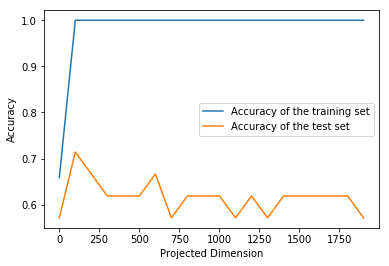

In [10]:
### TODO ### 
## Choose a range of different projected dimensions to test
## Suggested range of projected dimensions:
upperbnd = d
project_dimensions = range(1,upperbnd,int((upperbnd )/20))

#############
from sklearn import random_projection

test_accuracy = []
training_accuracy = []
s = 20
for r in project_dimensions: 
    ### TODO ###   
    # 3)    project the data matrix $X \rightarrow XW$ using Gaussian and fit, 
    #      transform and score using Logstic Regression
    # trainscore =  ??
    
    # Gaussian random projection
    transformer = random_projection.GaussianRandomProjection(r, random_state=42)
    X_new = transformer.fit_transform(X)
    
    # Train/Test split
    X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.33, random_state=42)
    
    # Logistic Regression
    log_reg_new = LogisticRegression(C = C0) # , multi_class = "multinomial"
    log_reg_new.fit(X_train_new, y_train_new)
    
    # Train score
    trainscore = log_reg_new.score(X_train_new,y_train_new)
    training_accuracy.append(trainscore)
    
    # Testscore
    testscore= log_reg_new.score(X_test_new,y_test_new)
    test_accuracy.append(testscore)
    #############
    print ("project dimension %4d gives: (train, test) =  (%.4f, %.4f)" % (r, trainscore,testscore))
# coef_recover= log_regt.coef_.dot(X_train.transpose())

plt.plot(project_dimensions,training_accuracy, label='Accuracy of the training set')
plt.plot(project_dimensions,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Projected Dimension')
plt.legend()
index_max = np.argmax(test_accuracy)
print("Best score was for r =%5d with: (train, test) =  (%.4f, %.4f)"% (project_dimensions[index_max], training_accuracy[index_max],test_accuracy[index_max]))

**Observations**: we can observe that the accuracy on the test set varies a lot, even globally decreases, for a gaussian random projection. That is not really a surprise: the JL Lemma states that the embedding dimension needs to be $r = O(10^4)$. Here $d = 2000$, that is to say $d < 10^4$. JL lemma is useless here. However there is a lot of r for which we find the score using the $XX^\top$ technique for the training.


## Exercise 2:

In class we used 
$$ X \rightarrow W^\top X $$
But here it is instead
$$ X \rightarrow X W $$



Now we will train a model using a large text based data set. For this you need to code the following random transform $W \in \mathbb{R}^{d \times r}$ that takes a sparsity parameter $s$ as an input and outputs a matrix

$$ W_{ij}  = \sqrt{\frac{s}{r}}
\begin{cases}
1 \quad & \mbox{with probability }\frac{1}{2s} \\
0 \quad & \mbox{with probability }1-\frac{1}{s} \\
-1 \quad & \mbox{with probability }\frac{1}{2s} 
\end{cases}$$

* Code a function Generate_Sparse_Transform$(s,r,d)$ that takes an input  
   * sparsity parameter  $s$
   * input dimension $d \in \mathbb{N}$
   * lower dimensional projected dimension $r \in \mathbb{N}$
and gives as outputs the matrix $W$ stored in an efficient sparse format such as the CSC formart (see scipy.sparse.csc_matrix)

* Code a function Apply_Sparse_Transform$(R,X)$ that takes an input
   * the random transform $W$ as generated by  Generate\_sparse\_transform$(s,r,d)$
   * a given data matrix $X \in \mathbb{R}^{n\times d}$
the output will be $XW$.


*Note* if you have not implemented this efficiently, you will probably run out of memory!  


We will test if random projections are able to preserve pairwise distances by applying K-Neighrest Neighbors to projected data.

1) [6pts] Code the above two functions (their stub is provided below)


2) [1pt] Load the data set X. Then fit, transform and score sklearn's KNeighborsClassifier on this data, where 
$X = $ {anthracyclineTaxaneChemotherapy, sector.scale}. Below you will find how to load this data.

3) [3pts] Repeat the previous step, but first randomly project that data using X -> XW. Repeat this test for different values of the sparsity parameter s and projected dimension parameter r. What can you conclude? 

*Hint* As a rule of thumb $s = \sqrt{r}$, $s= \log(r)$ or simply $s=20$ often works well.


In [11]:
import scipy
from sklearn.utils.extmath import safe_sparse_dot   ## <-- I recommend using this function
from sklearn.utils.random import sample_without_replacement  ## <-- I recommend using this function
from scipy.sparse import csc_matrix, issparse

def GenerateSparseTransform(s,r,d):
    ### TODO ### 
    ##  Implement this function. Make sure that W is a sparse matrix!
    #############
    W = np.sqrt(s/r)*np.random.choice([1, 0, -1], (d,r), p=[1/(2*s), 1 - 1/s, 1/(2*s)])
    W = csc_matrix(W)
    return W

def ApplySparseTransform(W,X_):
#     W   : Sparse randomly generated matrix of size d by r
#     X_  : Data matrix to be compressed, of size n by d
#    NOTE: The dimensions of W and X_ are such that the product X_*W is defined (which is different that what we used in class)
    ### TODO ### 
    ##  Implement this function. Make sure that W is a sparse matrix!
    #############
    
    if not issparse(W):
        raise Exception("W is not a sparse matrix.")
        
    Xtransformed = safe_sparse_dot(X_, W)
    return Xtransformed

## Load and test easier data set *anthracyclineTaxaneChemotherapy*

In [44]:
from sklearn.datasets import fetch_openml
chemo = fetch_openml(name='anthracyclineTaxaneChemotherapy')

In [45]:
X = chemo.data
y = chemo.target

### if fetch_openml fails  
**ALTERNATIVE HACK for loading the data**
  
* downloard the data from data set in arff format from: https://www.openml.org/d/1085
 
* place data in the same folder as this notebook and run the code in the next cell

In [14]:
## ALTERNATIVE HACK for loading anthracyclineTaxaneChemotherapy ## 
from scipy.io import arff
dataset = arff.loadarff('phpCLGrjq.arff')
import pandas as pd
Xdf = pd.DataFrame(dataset[0])
Xy = Xdf.as_matrix()
n_rows, n_cols = Xy.shape
X = Xy[:,:-1]
X = np.float_(X)
y = Xy[:,-1]
y = (np.int_(y))*2-3

In [46]:
# split test and training. Only use 20% of data for testing because data set is small. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 
n, d = X_train.shape
print('{n} training data points and {d} features'.format(n = n,d =d))

127 training data points and 61359 features


In [47]:
# 2) fit, transform and score the knn Classifier
n_neighbors =2 # <-- use this number of neighbours
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

knn.fit(X_train,y_train)
trainscore = knn.score(X_train, y_train)
training_accuracy.append(trainscore)
testscore = knn.score(X_test, y_test)
test_accuracy.append(knn.score(X_test, y_test))
print ("project dim %5d gives: (train, test) =  (%.4f, %.4f)" % (d, trainscore,testscore))

project dim 61359 gives: (train, test) =  (0.8425, 0.5625)


### Projected dimension r variation

project dim    30 gives: (train, test) =  (0.7953, 0.5000)
project dim   408 gives: (train, test) =  (0.8268, 0.5625)
project dim   786 gives: (train, test) =  (0.8346, 0.5625)
project dim  1164 gives: (train, test) =  (0.8268, 0.5625)
project dim  1542 gives: (train, test) =  (0.8504, 0.5938)
project dim  1920 gives: (train, test) =  (0.8268, 0.5625)
project dim  2298 gives: (train, test) =  (0.8425, 0.5938)
project dim  2676 gives: (train, test) =  (0.8268, 0.5625)
project dim  3054 gives: (train, test) =  (0.8504, 0.5938)
project dim  3432 gives: (train, test) =  (0.8425, 0.5938)
Best score was for r = 1542 with: (train, test) =  (0.8504, 0.5938)


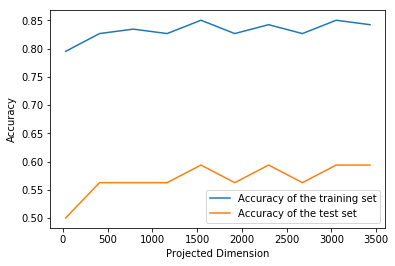

In [48]:
test_accuracy = []
training_accuracy = []
n_neighbors =2  #< -- I recommend 2 neighbors

## Suggested range of projected dimensions:
upperbnd = int(min(30*n,d/2))
minbnd = int(max(n/20,d/2000))
project_dimensions = range(minbnd,upperbnd,int((upperbnd -minbnd)/10))

knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
for r in project_dimensions:  
    W = GenerateSparseTransform(s =20, r= r,d = d) # function coded above
    Xt_train = ApplySparseTransform(W,X_train)  # function coded above
    Xt_test =  ApplySparseTransform(W,X_test)  # function coded above
    knn.fit(Xt_train,y_train)
    trainscore = knn.score(Xt_train, y_train)
    training_accuracy.append(trainscore)
    testscore = knn.score(Xt_test, y_test)
    test_accuracy.append(knn.score(Xt_test, y_test))
    print ("project dim %5d gives: (train, test) =  (%.4f, %.4f)" % (r, trainscore,testscore))

list_proj_dims = list(project_dimensions)
plt.plot(list_proj_dims,training_accuracy, label='Accuracy of the training set')
plt.plot(list_proj_dims,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Projected Dimension')
plt.legend()
index_max = np.argmax(test_accuracy)
print("Best score was for r =%5d with: (train, test) =  (%.4f, %.4f)"% (list_proj_dims[index_max], training_accuracy[index_max],test_accuracy[index_max]))

## Load and test HARDER data set *sector.scale*  
**(only try this data set after successfully testing the anthracyclineTaxaneChemotherapy data set)**

In [18]:
# Download the data set from:
# https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/sector/sector.scale.bz2
# place data in the same folder as this python notebook
dataname = "sector.scale"  
X, y = get_data(dataname)
n, d = X.shape
print('{n} data points and {d} features'.format(n = n,d =d))

6412 data points and 55197 features


In [19]:
# split test and training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n, d = X_train.shape
print('{n} trainig data points and {d} features'.format(n = n,d =d))

4296 trainig data points and 55197 features


In [20]:
### TODO ### 
## repeat the same experiments for this larger data set
## HINT: Only test project dimensions r <= int(min(2*n,d/2))
#############

### Projected dimension r variation

project dim   214 gives: (train, test) =  (1.0000, 0.7732)
project dim  1051 gives: (train, test) =  (1.0000, 0.8648)
project dim  1888 gives: (train, test) =  (1.0000, 0.8752)
project dim  2725 gives: (train, test) =  (1.0000, 0.8776)
project dim  3562 gives: (train, test) =  (1.0000, 0.8790)
project dim  4399 gives: (train, test) =  (1.0000, 0.8809)
project dim  5236 gives: (train, test) =  (1.0000, 0.8785)
project dim  6073 gives: (train, test) =  (1.0000, 0.8819)
project dim  6910 gives: (train, test) =  (1.0000, 0.8785)
project dim  7747 gives: (train, test) =  (1.0000, 0.8804)
project dim  8584 gives: (train, test) =  (1.0000, 0.8809)
Best score was for r = 6073 with: (train, test) =  (1.0000, 0.8819)


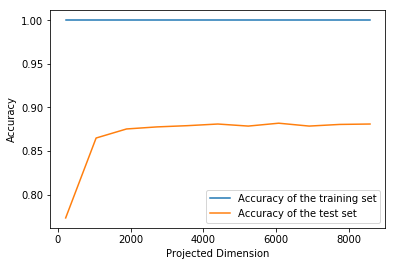

In [21]:
test_accuracy = []
training_accuracy = []
n_neighbors =1   ## <-- I recommend using this
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

upperbnd = int(min(2*n,d/2))
minbnd = int(max(n/20,d/2000))
project_dimensions = range(minbnd,upperbnd,int((upperbnd -minbnd)/10))

for r in project_dimensions:  
    ### TODO ###   
    # 3)    project the data matrix $X \rightarrow XW$ using Gaussian and fit, 
    #      transform and score using knn
    W = GenerateSparseTransform(s =20, r= r,d = d) # function coded above
    Xt_train = ApplySparseTransform(W,X_train)  # function coded above
    Xt_test =  ApplySparseTransform(W,X_test)  # function coded above
    knn.fit(Xt_train,y_train)
    trainscore = knn.score(Xt_train, y_train)
    training_accuracy.append(trainscore)
    testscore = knn.score(Xt_test, y_test)
    test_accuracy.append(knn.score(Xt_test, y_test))
    print ("project dim %5d gives: (train, test) =  (%.4f, %.4f)" % (r, trainscore,testscore))

list_proj_dims = list(project_dimensions)
plt.plot(list_proj_dims,training_accuracy, label='Accuracy of the training set')
plt.plot(list_proj_dims,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Projected Dimension')
plt.legend()
index_max = np.argmax(test_accuracy)
print("Best score was for r =%5d with: (train, test) =  (%.4f, %.4f)"% (list_proj_dims[index_max], training_accuracy[index_max],test_accuracy[index_max]))

**Observations**:  We see that here random projections are able to preserve pairwise distances by applying K-Neighrest Neighbors to projected data, as the accuracy of the KNeighborsClassifier is around the score obtained without projecting the data.  
  
The sparse matrix format makes possible to compute the results, although it takes quite a long time.  
  
For the harder data set sector.scale, r variation confirms that from a certain value of the projected dimension, the accuracy will not increase significantly since we capture almost all the variability of data. The distance between datapoints can be preserved after begin embedded in a low dimensional space, upto a certain precision, with the condition that we have a r high enough.

## Bonus question

Using the Jonhson-Lindenstrauss Lemma, we can have an estimate for the projected dimension using

$$r = \frac{1}{\epsilon^2}\log(n/\delta) $$

1) Write a function for calculating this given suggested project dimension r. 
2) Test for each of the above data sets with \epsilon = 0.05 = \delta and compare to your results. 

In [43]:
def JLLemma_projected_dim(n, eps, delta):
    return int( 1/eps**2 * np.log(n/delta) )

## data set *anthracyclineTaxaneChemotherapy*

In [23]:
from sklearn.datasets import fetch_openml
chemo = fetch_openml(name='anthracyclineTaxaneChemotherapy')

In [24]:
X = chemo.data
y = chemo.target

In [49]:
# split test and training. Only use 20% of data for testing because data set is small. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 
n, d = X_train.shape
print('{n} training data points and {d} features'.format(n = n,d =d))

127 training data points and 61359 features


In [51]:
n_neighbors =2  #< -- I recommend 2 neighbors

knn = KNeighborsClassifier(n_neighbors=n_neighbors)

r = JLLemma_projected_dim(n, 0.05, 0.05) # Jonhson-Lindenstrauss Lemma estimated dimension
print('Jonhson-Lindenstrauss Lemma estimated dimension: {}'.format(r))

W = GenerateSparseTransform(s =20, r= r,d = d) # function coded above
Xt_train = ApplySparseTransform(W,X_train)  # function coded above
Xt_test =  ApplySparseTransform(W,X_test)  # function coded above
knn.fit(Xt_train,y_train)
trainscore = knn.score(Xt_train, y_train)
testscore = knn.score(Xt_test, y_test)
print ("project dim %5d gives: (train, test) =  (%.4f, %.4f)" % (r, trainscore,testscore))

Jonhson-Lindenstrauss Lemma estimated dimension: 3135
project dim  3135 gives: (train, test) =  (0.8189, 0.5938)


## HARDER data set sector.scale

In [40]:
# Download the data set from:
# https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/sector/sector.scale.bz2
# place data in the same folder as this python notebook
dataname = "sector.scale"  
X, y = get_data(dataname)
n, d = X.shape
print('{n} data points and {d} features'.format(n = n,d =d))

6412 data points and 55197 features


In [41]:
# split test and training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n, d = X_train.shape
print('{n} trainig data points and {d} features'.format(n = n,d =d))

4296 trainig data points and 55197 features


In [42]:
n_neighbors =1  #< -- I recommend using this

knn = KNeighborsClassifier(n_neighbors=n_neighbors)

r = JLLemma_projected_dim(n, 0.05, 0.05) # Jonhson-Lindenstrauss Lemma estimated dimension

W = GenerateSparseTransform(s =20, r= r,d = d) # function coded above
Xt_train = ApplySparseTransform(W,X_train)  # function coded above
Xt_test =  ApplySparseTransform(W,X_test)  # function coded above
knn.fit(Xt_train,y_train)
trainscore = knn.score(Xt_train, y_train)
testscore = knn.score(Xt_test, y_test)
print ("project dim %5d gives: (train, test) =  (%.4f, %.4f)" % (r, trainscore,testscore))

project dim  4544 gives: (train, test) =  (1.0000, 0.8790)


**Observations**: Jonhson-Lindenstrauss Lemma estimated dimensions are close to the ones where accuracy score seems to stabilise. JL lemma stands for a projected dimension $r = O(\epsilon^{-2} log(n))$  